In [8]:
import numpy as np
import cv2
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
train_dir = '../input/fer2013/train/'
test_dir = '../input/fer2013/test/'

In [10]:
print('total train folder: ',len(os.listdir(train_dir)))
print('total test folder:',len(os.listdir(test_dir)))

total train folder:  7
total test folder: 7


In [11]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(48,48),
                                                   color_mode="grayscale")     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=64,
                                                         class_mode  = 'categorical',
                                                         target_size = (48,48),
                                                          color_mode="grayscale")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [14]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=test_generator,
        validation_steps=7178 // 64,verbose=1)

Epoch 1/50
448/448 [==============================] - 225s 502ms/step - loss: 1.8054 - accuracy: 0.2564 - val_loss: 1.7420 - val_accuracy: 0.3217
Epoch 2/50
448/448 [==============================] - 224s 500ms/step - loss: 1.6350 - accuracy: 0.3608 - val_loss: 1.5409 - val_accuracy: 0.4082
Epoch 3/50
448/448 [==============================] - 224s 500ms/step - loss: 1.5216 - accuracy: 0.4138 - val_loss: 1.4508 - val_accuracy: 0.4480
Epoch 4/50
448/448 [==============================] - 220s 492ms/step - loss: 1.4446 - accuracy: 0.4474 - val_loss: 1.3868 - val_accuracy: 0.4749
Epoch 5/50
448/448 [==============================] - 226s 504ms/step - loss: 1.3775 - accuracy: 0.4767 - val_loss: 1.3299 - val_accuracy: 0.4944
Epoch 6/50
448/448 [==============================] - 219s 490ms/step - loss: 1.3310 - accuracy: 0.4948 - val_loss: 1.2916 - val_accuracy: 0.5084
Epoch 7/50
448/448 [==============================] - 222s 496ms/step - loss: 1.2861 - accuracy: 0.5110 - val_loss: 1.2576 -

In [18]:
model.save('mymodel3.h5')
model.save_weights("weights3.h5")

In [19]:
model_json=model.to_json()
with open('model3.json',"w") as file:
  file.write(model_json)

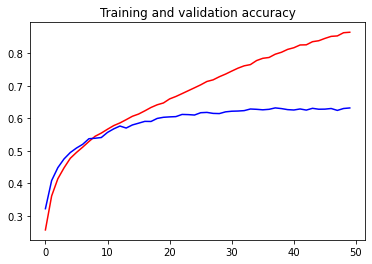

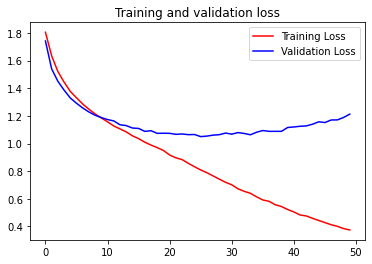

In [20]:
import  matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()